# Training a Multilayer Neural Network for Image Classification

Importing all needed packages

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import os
import tensorflow as tf


os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

Load MNIST dataset

In [20]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Normalize pixel values to [0, 1]

In [21]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

Reshape data for neural network input

In [22]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [23]:
print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}, y_test shape: {y_test.shape}")

x_train shape: (60000, 28, 28), y_train shape: (60000, 10)
x_test shape: (10000, 28, 28), y_test shape: (10000, 10)


### Plot a few samples with their labels

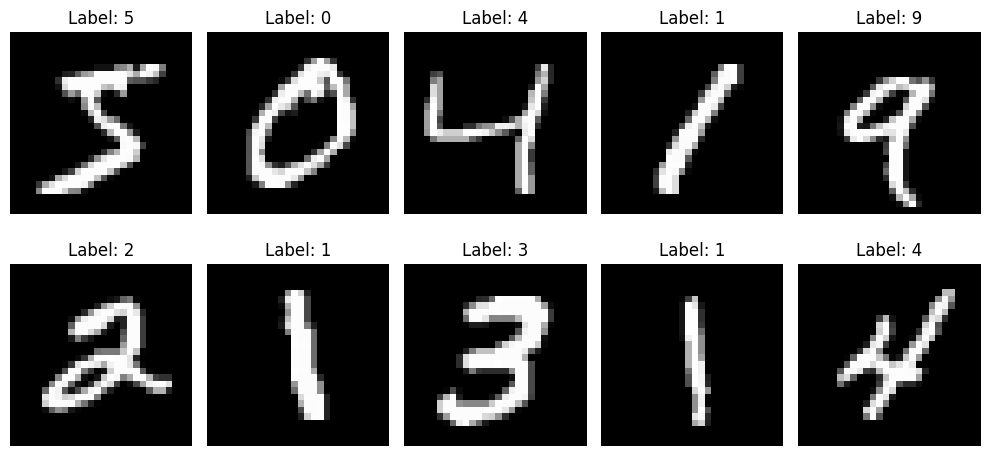

In [24]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i].reshape(28, 28), cmap="gray")
    plt.title(f"Label: {np.argmax(y_train[i])}")
    plt.axis("off")
plt.tight_layout()
plt.show()

## Define the neural network architecture

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, Dropout

Build the neural network model

In [26]:
model = Sequential([
    Input(shape=(28, 28, 1)),  
    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # Output layer for 10 classes
])

Compile the model

In [27]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  # Loss function for multi-class classification
    metrics=['accuracy']  
)

In [28]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Train the model

In [29]:
history = model.fit(
    x_train,        # Training images
    y_train,        # Training labels
    epochs=10,      
    batch_size=128, 
    validation_split=0.2  # Use 20% of training data for validation
)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.6611 - loss: 1.0908 - val_accuracy: 0.9678 - val_loss: 0.1140
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9328 - loss: 0.2499 - val_accuracy: 0.9729 - val_loss: 0.1048
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.9458 - loss: 0.2077 - val_accuracy: 0.9774 - val_loss: 0.0932
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.9575 - loss: 0.1724 - val_accuracy: 0.9808 - val_loss: 0.0812
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9566 - loss: 0.1818 - val_accuracy: 0.9802 - val_loss: 0.0878
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9601 - loss: 0.1801 - val_accuracy: 0.9827 - val_loss: 0.0849
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9575 - loss: 0.1948 - val_accuracy: 0.9834 - val_loss: 0.0764
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9591 - loss: 0.1941 - val_accu

## Evaluate the model

In [30]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)

print(f"Test Accuracy: {test_accuracy:.4f}")

313/313 - 2s - 7ms/step - accuracy: 0.9861 - loss: 0.0737
Test Accuracy: 0.9861


## Visualizing the training process

Plot training and validation accuracy

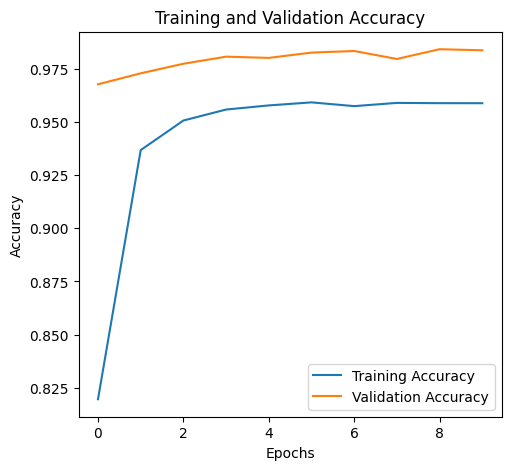

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

Plot training and validation loss

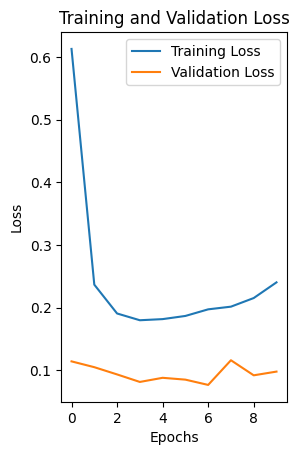

In [32]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Now test the model on individual Images

In [33]:
import numpy as np

random_idx = np.random.randint(0, len(x_test))
test_image = x_test[random_idx]
test_label = np.argmax(y_test[random_idx])

Predict the label for the test image

In [34]:
prediction = np.argmax(model.predict(test_image.reshape(1, 28, 28, 1)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Plot the image and show prediction

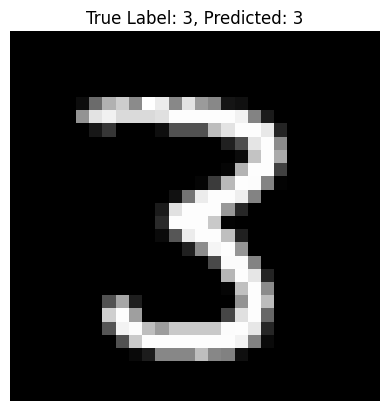

In [35]:
plt.imshow(test_image.reshape(28, 28), cmap='gray')
plt.title(f"True Label: {test_label}, Predicted: {prediction}")
plt.axis('off')
plt.show()

In [36]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"The Highest Test Accuracy Achieved: {test_accuracy * 100:.2f}%")

The Highest Test Accuracy Achieved: 98.61%
